In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def logistic(x):   
    if x >= 0:
        z = np.exp(-x)
        a=1 / (1 + z)
    else:        
        z = np.exp(x)
        a= z / (1 + z)
    return  a
correct_classification_count = 0
def logistic_deriv(x):
    return logistic(x) * (1 - logistic(x))

LR = 1   

I_dim = 17
H_dim = 3

epoch_count = 1

In [30]:
training_data = pd.read_csv('Absenteeism_at_work.csv', sep = ';')
training_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [31]:
training_data.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [32]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

In [33]:
training_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


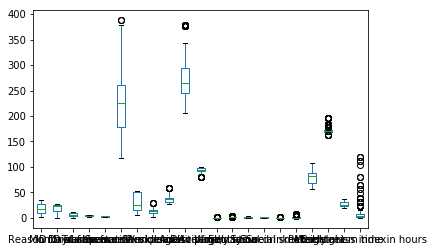

In [34]:
training_data.plot(kind='box')

In [35]:
cols = training_data.columns.tolist()
cols.pop(0)

'ID'

Reason for absence
Month of absence
Day of the week
Seasons
Transportation expense
Distance from Residence to Work
Service time
Age
Work load Average/day 
Hit target
Disciplinary failure
Education
Son
Social drinker
Social smoker
Pet
Weight
Height
Body mass index
Absenteeism time in hours


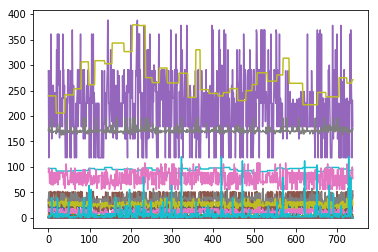

In [36]:
for i in cols:
    print(i)
    training_data[i].plot()

Text(0.5, 1.0, 'Average')

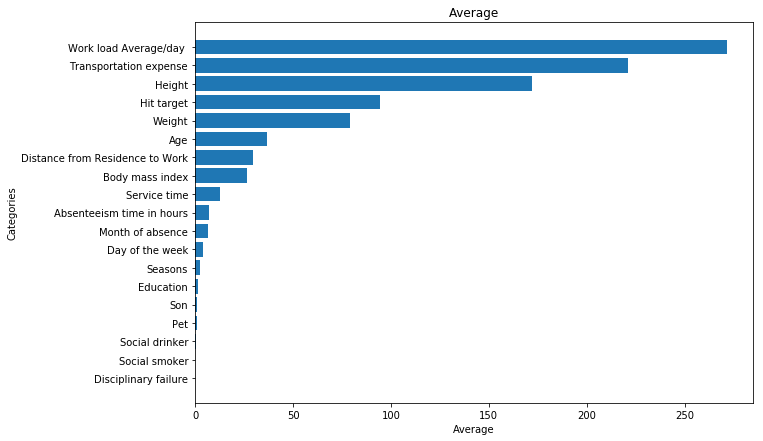

In [37]:
AvgR = training_data[cols[1:]].mean()
AvgR = AvgR.sort_values()
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(cols[1:])), AvgR.values, align='center')
plt.yticks(np.arange(len(cols[1:])), AvgR.index)
plt.ylabel('Categories')
plt.xlabel('Average')
plt.title('Average')

In [38]:
training_data['Absenteeism time in hours'].replace(0,"NOT ABSENT",inplace=True)
training_data['Absenteeism time in hours'].replace([1,2,3,4,5,6,7,8,9,10,16],"DAYS",inplace=True)
training_data['Absenteeism time in hours'].replace([16,24,40,32,56,48],"WEEK",inplace=True)
training_data['Absenteeism time in hours'].replace([120,80,64,112,104],"MONTH",inplace=True)
training_data['Absenteeism time in hours'].value_counts()

DAYS          652
NOT ABSENT     44
WEEK           32
MONTH          12
Name: Absenteeism time in hours, dtype: int64

In [39]:
#np.random.seed(1)
weights_ItoH = np.random.uniform(-1, 1, (I_dim, H_dim))
weights_HtoO = np.random.uniform(-1, 1, H_dim)

preActivation_H = np.zeros(H_dim)
postActivation_H = np.zeros(H_dim)

training_data = pd.read_csv('Absenteeism_at_work.csv', sep = ';')
training_data.rename(columns={"Absenteeism time in hours": "Default"}, inplace=True)
training_data.drop('ID', axis = 1, inplace =True) # drop column "ID"
#training_data['Defaul'].unique()



target_output = training_data['Default']
training_data = training_data.drop('Default',axis = 1)

training_data = training_data.drop('Month of absence',axis = 1)
training_data = training_data.drop('Service time',axis = 1)

training_data = np.asarray(training_data)
training_count = len(training_data[:,0])

In [40]:
validation_data = pd.read_excel("Absenteeism_at_work.xls")
validation_data.rename(columns={"Absenteeism time in hours": "Default"}, inplace=True)
validation_data.drop('ID', axis = 1, inplace =True) # drop column "ID"
validation_data.drop('Month of absence', axis = 1, inplace =True) # drop column "ID"
validation_data.drop('Service time', axis = 1, inplace =True) # drop column "ID"
validation_data['Default'].unique()
validation_output = validation_data['Default']
validation_data = validation_data.drop('Default', axis=1) 
validation_data = np.asarray(validation_data)
validation_count = len(validation_data[:,0])

In [41]:

#------------------------------training----------------------------

for epoch in range(epoch_count):
    for sample in range(training_count):
        for node in range(H_dim):
            preActivation_H[node] = np.dot(training_data[sample,:], weights_ItoH[:, node])
            postActivation_H[node] = logistic(preActivation_H[node])
            
        preActivation_O = np.dot(postActivation_H, weights_HtoO)
        postActivation_O = logistic(preActivation_O)
        
        FE = postActivation_O - target_output[sample]
        
        for H_node in range(H_dim):
            S_error = FE * logistic_deriv(preActivation_O)
            gradient_HtoO = S_error * postActivation_H[H_node]
                       
            for I_node in range(I_dim):
                input_value = training_data[sample, I_node]
                gradient_ItoH = S_error * weights_HtoO[H_node] * logistic_deriv(preActivation_H[H_node]) * input_value
                
                weights_ItoH[I_node, H_node] -= LR * gradient_ItoH
                
            weights_HtoO[H_node] -= LR * gradient_HtoO


In [42]:

#------------------------------------validation--------------------------
           

for sample in range(validation_count):
    for node in range(H_dim):
        preActivation_H[node] = np.dot(validation_data[sample,:], weights_ItoH[:, node])
        postActivation_H[node] = logistic(preActivation_H[node])
            
    preActivation_O = np.dot(postActivation_H, weights_HtoO)
    postActivation_O = logistic(preActivation_O)
        
    if postActivation_O > 0.5:
        output = 1
    else:
        output = 0     
        
    if output == validation_output[sample]:
        correct_classification_count += 1

print('Percentage of correct classifications:')
print(correct_classification_count*100/validation_count)

Percentage of correct classifications:
11.891891891891891
